In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances
from gensim.models import Word2Vec

In [3]:
VECTOR_SIZE = 100
WINDOW = 5
MIN_COUNT = 10
WORKERS = 4

In [4]:
df = pd.read_csv('preprocessed_articles.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df[df.notnull()]
df.shape

(37255, 1)

In [5]:
lst = []
for elem in df.values:
    try:
        lst.append(elem[0].split())
    except AttributeError:
        pass
print(len(lst))

37246


In [6]:
w2v_model = Word2Vec(lst,
                     min_count=MIN_COUNT,
                     window=WINDOW,
                     vector_size=VECTOR_SIZE,
                     workers=WORKERS
                    )

In [7]:
w2v_model.wv.most_similar('neuron', topn=10)

[('synapsis', 0.8448494672775269),
 ('synaptic', 0.8084245324134827),
 ('spike', 0.8081303834915161),
 ('excitatory', 0.7505803108215332),
 ('neuronal', 0.7467785477638245),
 ('inhibition', 0.7445040941238403),
 ('cortical', 0.7358939051628113),
 ('inhibitory', 0.7083175182342529),
 ('plasticity', 0.7074270248413086),
 ('synapse', 0.6925761103630066)]

In [8]:
class MeanEmbeddingVectorizer:
    def __init__(self, word2vec):
        self.word2vec = word2vec

    def fit(self, X, y):
        return self

    def transform(self, X):
        w2v_arr = [np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv], axis=0)
                           for words in X]
        
        return w2v_arr

In [9]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(w2v_model)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
vectorizer_lst = mean_embedding_vectorizer.transform(lst)

In [10]:
S = pairwise_distances(vectorizer_lst[:8000], metric = 'cosine', n_jobs = -1)

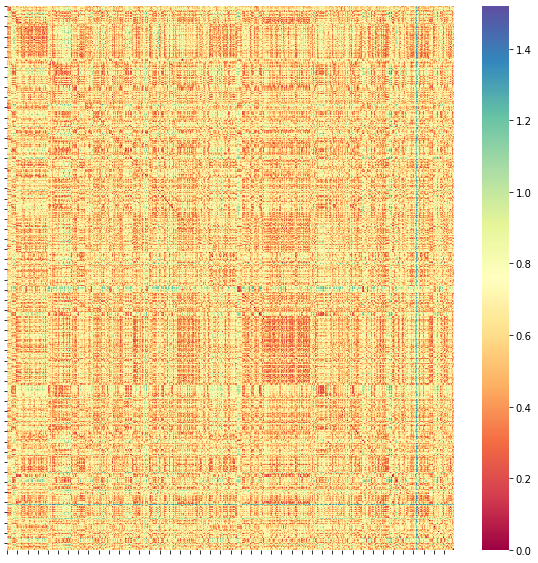

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(data = S, cmap = 'Spectral').set(xticklabels = [],yticklabels = []);